In [58]:
import numpy as np
import pandas as pd

from time import sleep

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
def spelling_bee(order='decreasing', iterations=1000000):    
    
    #returns the winner of a single spelling bee
    def single_contest(contestant_list):
        con = contestant_list.copy()
        while len(con) > 1:
            for turn in con:
                n = np.random.binomial(1, turn)
                if not n:
                    con.remove(turn)
                if len(con) == 1:
                    winner = con[0]
        return winner
    
    if order == 'decreasing':
        contestants = [x/100 for x in range(99,89,-1)]
    elif order == 'increasing':
        contestants = [x/100 for x in range(90,100)]
    else:
        return 'incorrect order'
    
    its = iterations
        
#   #list fills with winner if .99 is winner
    winners = []
    
    while iterations:
        x = single_contest(contestants)
        if x == .99:
            winners.append(x)
        iterations -= 1
    
    #returns % of times the p=.99 contestant wins 
    return len(winners)/its

In [15]:
#find average of 100 times iterating 1,000,000 times (.99 goes first)
results_99_first = []
for jj in range(100):
    results_99_first.append(spelling_bee())
    print(f'{jj} done, buddy.')
    sleep(80)

answer_1 = np.mean(results_99_first)
answer_1

0 done, buddy.
1 done, buddy.
2 done, buddy.
3 done, buddy.
4 done, buddy.
5 done, buddy.
6 done, buddy.
7 done, buddy.
8 done, buddy.
9 done, buddy.
10 done, buddy.
11 done, buddy.
12 done, buddy.
13 done, buddy.
14 done, buddy.
15 done, buddy.
16 done, buddy.
17 done, buddy.
18 done, buddy.
19 done, buddy.
20 done, buddy.
21 done, buddy.
22 done, buddy.
23 done, buddy.
24 done, buddy.
25 done, buddy.
26 done, buddy.
27 done, buddy.
28 done, buddy.
29 done, buddy.
30 done, buddy.
31 done, buddy.
32 done, buddy.
33 done, buddy.
34 done, buddy.
35 done, buddy.
36 done, buddy.
37 done, buddy.
38 done, buddy.
39 done, buddy.
40 done, buddy.
41 done, buddy.
42 done, buddy.
43 done, buddy.
44 done, buddy.
45 done, buddy.
46 done, buddy.
47 done, buddy.
48 done, buddy.
49 done, buddy.
50 done, buddy.
51 done, buddy.
52 done, buddy.
53 done, buddy.
54 done, buddy.
55 done, buddy.
56 done, buddy.
57 done, buddy.
58 done, buddy.
59 done, buddy.
60 done, buddy.
61 done, buddy.
62 done, buddy.
63

0.5137269400000001

.99 goes first = 0.5137269400000001

In [17]:
#find average of 100 times iterating 1,000,000 times (.99 goes last)
results_99_last = []
for jj in range(100):
    results_99_last.append(spelling_bee(order='increasing'))
    print(f'{jj} done, buddy.')
    sleep(80)

answer_2 = np.mean(results_99_last)
answer_2

0 done, buddy.
1 done, buddy.
2 done, buddy.
3 done, buddy.
4 done, buddy.
5 done, buddy.
6 done, buddy.
7 done, buddy.
8 done, buddy.
9 done, buddy.
10 done, buddy.
11 done, buddy.
12 done, buddy.
13 done, buddy.
14 done, buddy.
15 done, buddy.
16 done, buddy.
17 done, buddy.
18 done, buddy.
19 done, buddy.
20 done, buddy.
21 done, buddy.
22 done, buddy.
23 done, buddy.
24 done, buddy.
25 done, buddy.
26 done, buddy.
27 done, buddy.
28 done, buddy.
29 done, buddy.
30 done, buddy.
31 done, buddy.
32 done, buddy.
33 done, buddy.
34 done, buddy.
35 done, buddy.
36 done, buddy.
37 done, buddy.
38 done, buddy.
39 done, buddy.
40 done, buddy.
41 done, buddy.
42 done, buddy.
43 done, buddy.
44 done, buddy.
45 done, buddy.
46 done, buddy.
47 done, buddy.
48 done, buddy.
49 done, buddy.
50 done, buddy.
51 done, buddy.
52 done, buddy.
53 done, buddy.
54 done, buddy.
55 done, buddy.
56 done, buddy.
57 done, buddy.
58 done, buddy.
59 done, buddy.
60 done, buddy.
61 done, buddy.
62 done, buddy.
63

0.51951193

.99 goes last = 0.51951193

In [59]:
#function modified to return full list of winner for each contest
def spelling_bee(order='decreasing', iterations=1000000, ret='winners'):    
    
    #returns the winner of a single spelling bee
    def single_contest(contestant_list):
        con = contestant_list.copy()
        #added turns to calculate avg # of turns per spelling bee
        individual_turns = 0
        while len(con) > 1:
            for turn in con:
                individual_turns +=1
                n = np.random.binomial(1, turn)
                if not n:
                    con.remove(turn)
                if len(con) == 1:
                    winner = [con[0], individual_turns]
        return winner
    
    if order == 'decreasing':
        contestants = [x/100 for x in range(99,89,-1)]
    elif order == 'increasing':
        contestants = [x/100 for x in range(90,100)]
    else:
        return 'incorrect order'
    
    its = iterations
    
    #list fills with winner of each spelling bee
    winners = []
   
    while iterations:
        winners.append(single_contest(contestants))
        iterations -= 1   
    
#     #list fills with winner if .99 is winner
#     winners = []
    
#     while iterations:
#         x = single_contest(contestants)
#         if x == .99:
#             winners.append(x)
#         iterations -= 1
    
    if ret == 'winners':
        return winners
    else:
        return len(winners)/its
    

-----------

showing actual results for twenty million spelling bees

1- descending order

In [32]:
example_decrease = spelling_bee(ret='winners', iterations=20000000)

In [52]:
contestants = [x/100 for x in range(99,89,-1)]

win = [x[0] for x in example_decrease]

win_count = [win.count(x) for x in contestants]

decrease_counts = pd.DataFrame(win_count, contestants)
decrease_counts

,0
0.99,10271945
0.98,4304148
0.97,2200594
0.96,1241755
0.95,748895
0.94,471280
0.93,310384
0.92,207670
0.91,143363
0.90,99966


In [57]:
decrease_counts.to_csv('decrease_counts.csv')

In [91]:
contestants.reverse()

In [92]:
contestants

[0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

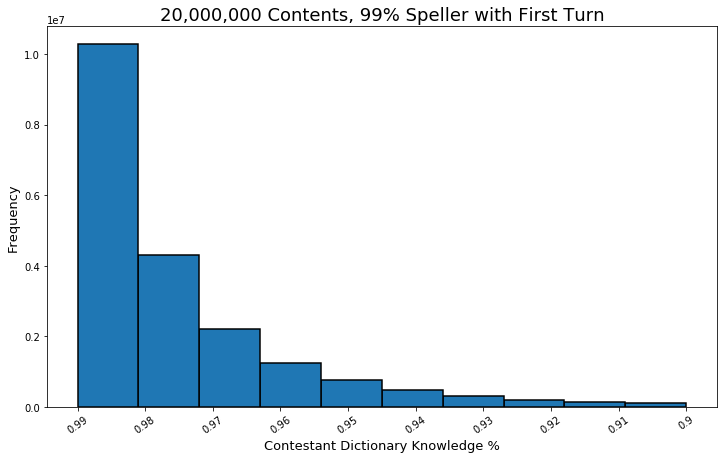

In [103]:
fig, ax = plt.subplots(figsize=(12,7))
plt.hist(win, edgecolor='k', linewidth=1.5)
plt.title('20,000,000 Contents, 99% Speller with First Turn', fontsize=18)
plt.xlabel('Contestant Dictionary Knowledge %', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
ax.set_xticks(ticks=contestants)
ax.set_xticklabels(contestants, rotation=35, ha='center')
ax.invert_xaxis();

In [106]:
turn_counts = [x[1] for x in example_decrease]

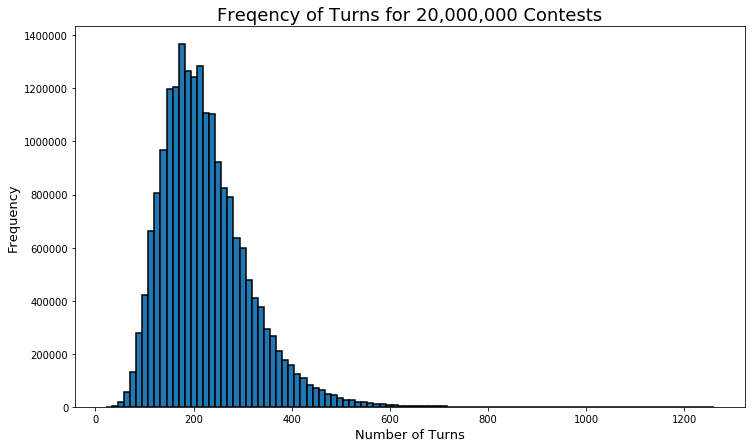

In [110]:
fig, ax = plt.subplots(figsize=(12,7))
plt.hist(turn_counts, bins= 100, edgecolor='k', linewidth=1.5)
plt.title('Freqency of Turns for 20,000,000 Contests', fontsize=18)
plt.xlabel('Number of Turns', fontsize=13)
plt.ylabel('Frequency', fontsize=13);

In [126]:
print(f'Shortest contest = {min(turn_counts)}')
print(f'Longest contest = {max(turn_counts)}')
print(f'Average contest = {np.mean(turn_counts)}')

Shortest contest = 21
Longest contest = 1261
Average contest = 223.8896097


In [122]:
10271945/20000000

0.51359725

--------

2- ascending order

In [33]:
example_increase = spelling_bee(order = 'increasing', iterations=20000000, ret='winners')

In [53]:
contestants2 = [x/100 for x in range(99,89,-1)]

win2 = [x[0] for x in example_increase]

win2_count = [win2.count(x) for x in contestants2]

increase_counts = pd.DataFrame(win2_count, contestants2)
increase_counts

,0
0.99,10394450
0.98,4361426
0.97,2210858
0.96,1232137
0.95,726500
0.94,443215
0.93,277885
0.92,175429
0.91,111344
0.90,66756


In [56]:
increase_counts.to_csv('increase_counts.csv')

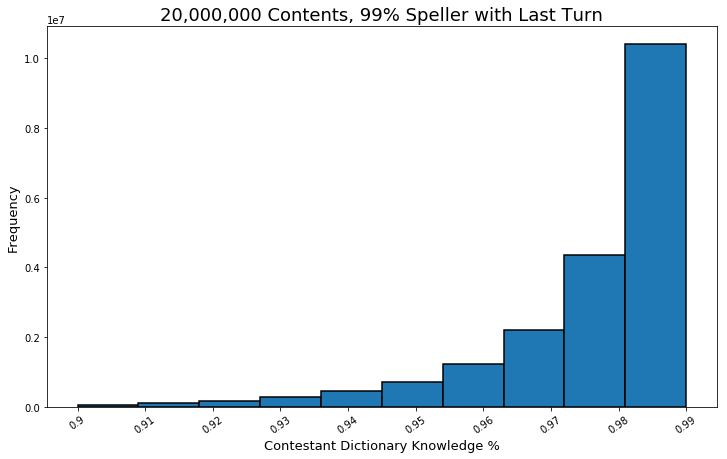

In [105]:
fig, ax = plt.subplots(figsize=(12,7))
plt.hist(win2, edgecolor='k', linewidth=1.5)
plt.title('20,000,000 Contents, 99% Speller with Last Turn', fontsize=18)
plt.xlabel('Contestant Dictionary Knowledge %', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
ax.set_xticks(ticks=contestants2)
ax.set_xticklabels(contestants2, rotation=35, ha='center');

In [111]:
turn_counts2 = [x[1] for x in example_increase]

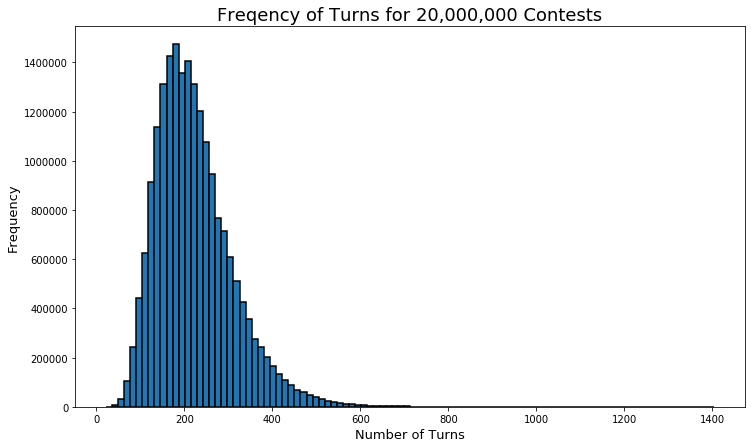

In [112]:
fig, ax = plt.subplots(figsize=(12,7))
plt.hist(turn_counts2, bins= 100, edgecolor='k', linewidth=1.5)
plt.title('Freqency of Turns for 20,000,000 Contests', fontsize=18)
plt.xlabel('Number of Turns', fontsize=13)
plt.ylabel('Frequency', fontsize=13);

In [125]:
print(f'Shortest contest = {min(turn_counts2)}')
print(f'Longest contest = {max(turn_counts2)}')
print(f'Average contest = {np.mean(turn_counts2)}')

Shortest contest = 21
Longest contest = 1405
Average contest = 223.31559605


In [123]:
10394450/20000000

0.5197225

In [127]:
%pastebin 1-30

'http://dpaste.com/259WCJB'